In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')

In [3]:
%config IPCompleter.greedy=True

In [154]:
from datetime import datetime

data = pd.read_csv("./xlsx/actas-resumen.csv")
# datetime.strptime(date_str, '%a %B %d %H:%M:%S +0800 %Y')
origin = data['file'].apply(lambda x: x.split('/')[1])
date = data['file'].apply(
    lambda x: 
    datetime.strptime(x.split('/')[2].replace('acta.', '').replace('.xlsx', ''), 
    '%Y.%m.%d.%H.%M.%S'))
date = pd.DatetimeIndex(date)
data.insert(0, 'date', date)
data.insert(1, 'origin', origin)

data.set_index('date')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
date       111 non-null datetime64[ns]
origin     111 non-null object
file       111 non-null object
%_total    111 non-null float64
%_cc       111 non-null float64
%_mas      111 non-null float64
%_diff     111 non-null float64
total      111 non-null int64
cc         111 non-null int64
mas        111 non-null int64
diff       111 non-null int64
delta      111 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 10.5+ KB


<Figure size 432x288 with 0 Axes>

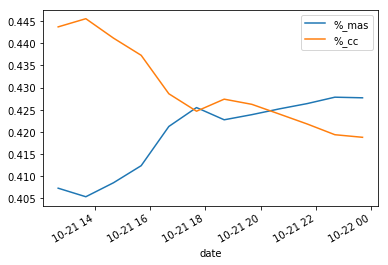

In [140]:
plt.figure()
computo = data[data['origin'] == 'computo']
trep = data[data['origin'] == 'trep']
mask = (computo['date'] > '2019-10-21 12:00') & (computo['date'] < '2019-10-22')
c = computo.loc[mask]
c.plot(x='date', y=['%_mas', '%_cc'])

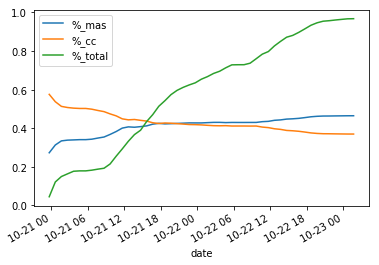

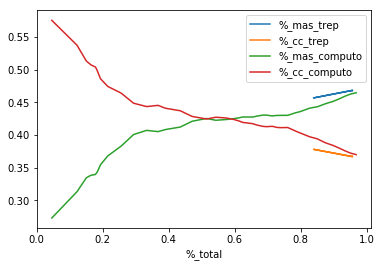

In [165]:
computo.plot(x='date', y=['%_mas', '%_cc', '%_total'])
mask = (trep['date'] > '2019-10-20 12:00') & (trep['date'] < '2019-10-22')
t = trep.loc[mask]
mask = (computo['date'] > '2019-10-20 12:00') & (computo['date'] < '2019-10-22')
c = computo.loc[mask]

b = pd.merge(trep, computo, on='%_total', how='outer', suffixes=('_trep', '_computo'))
b.set_index('%_total')
#mask = (b['%_total' > 0.8])
#f = b.loc(mask)

b.plot(x='%_total', y=['%_mas_trep', '%_cc_trep', '%_mas_computo', '%_cc_computo'])

In [104]:
trep

,date,origin,file,%_total,%_cc,%_mas,%_diff,total,cc,mas,diff,delta
0,2019-10-25 00:10:40,trep,./trep/acta.2019.10.25.00.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
1,2019-10-24 00:10:40,trep,./trep/acta.2019.10.24.00.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
2,2019-10-24 01:10:40,trep,./trep/acta.2019.10.24.01.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
3,2019-10-24 03:10:40,trep,./trep/acta.2019.10.24.03.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
4,2019-10-24 02:10:40,trep,./trep/acta.2019.10.24.02.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
5,2019-10-23 03:10:40,trep,./trep/acta.2019.10.23.03.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
6,2019-10-24 04:10:40,trep,./trep/acta.2019.10.24.04.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
7,2019-10-23 04:10:40,trep,./trep/acta.2019.10.23.04.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
8,2019-10-24 06:10:40,trep,./trep/acta.2019.10.24.06.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
9,2019-10-23 05:10:40,trep,./trep/acta.2019.10.23.05.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
